In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp
from msmbuilder.example_datasets import fetch_alanine_dipeptide
from msmbuilder.cluster import KCenters
from msmbuilder.msm import ContinuousTimeMSM, MarkovStateModel
from msmbuilder.msm import implied_timescales
import mdtraj as md

In [4]:
def load_Trajs(trajfiles_list, prmtop_file, stride=1, chunk=100):
    """
    Iteratively loads a list of NetCDF files and returns them
    as a list of mdtraj.Trajectory objects

    Parameters
    ----------
    trajfiles_list: list of str
            List with the names of trajectory files
    prmtop_file:  str
            Name of the prmtop file
    stride: int
            Frames to be used when loading the trajectories
    chunk:  int
            Number of frames to load at once from disk per iteration.
            If 0, load all.

    Returns
    -------
    list_chunks: list
            List of mdtraj.Trajectory objects, each of 'chunk' lenght
    """
    list_chunks = []
    for traj in trajfiles_list:
        for frag in md.iterload(traj, chunk=chunk, top=prmtop_file,
                                stride=stride):
            list_chunks.append(frag)
    return(list_chunks)

from glob import glob
tj_list = sorted(glob("run1/05*nc"))
tp = "run1/WT-ff14SB_clean.prmtop"
my_trajs = load_Trajs(tj_list, tp, chunk = 250)

In [6]:
heavy_inds = my_trajs[0].topology.select_atom_indices('heavy')

In [8]:
my_trajs = [t.atom_slice(heavy_inds) for t in my_trajs]

In [23]:
cluster = KCenters(metric='rmsd', n_clusters=250)
sequences = cluster.fit_transform(my_trajs)
print(cluster.summarize())

KCenters clustering
--------------------
n_clusters : 250
metric     : rmsd

Inertia       : 3957.1318614032243
Mean distance : 0.20556529150146619
Max  distance : 0.2829777313947186



In [24]:
lag_times = [1, 25, 50, 100]
n_timescales = 10

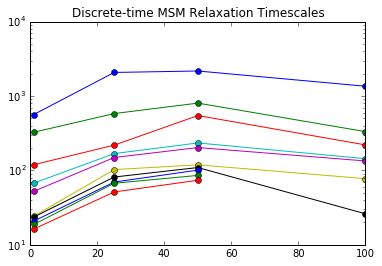

In [25]:
msm_timescales = implied_timescales(sequences, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False))
for i in range(n_timescales):
   pp.plot(lag_times, msm_timescales[:, i], 'o-')

pp.title('Discrete-time MSM Relaxation Timescales')
pp.semilogy()
pp.show()

In [26]:
ctmsm_timescales = implied_timescales(sequences, lag_times, n_timescales=n_timescales, msm=ContinuousTimeMSM(verbose=False))
for i in range(n_timescales):
   pp.plot(lag_times, ctmsm_timescales[:, i], 'o-')

pp.title('Continuous-Time MSM Relaxation Timescales')
pp.semilogy()
pp.show()

IndexError: index 0 is out of bounds for axis 1 with size 0